In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours,Cq,Cg

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [12]:
recastData = pd.read_pickle('limits_eft_cms_top_20_001.pcl')

### Add limits for Cg and Cq

In [13]:
Cgmax = []
Cqmax = []
gs = np.sqrt(1.63362817)
for irow,row in recastData.iterrows():
    Cgmax.append(Cg(row['mChi'],row['mST'],row['yDM (95% C.L.)'],gs))
    Cqmax.append(Cq(row['mChi'],row['mST'],row['yDM (95% C.L.)'],gs))
recastData['Cg (95% C.L.)'] = Cgmax
recastData['Cq (95% C.L.)'] = Cqmax

KeyError: 'mChi'

### Plot limit on yDM

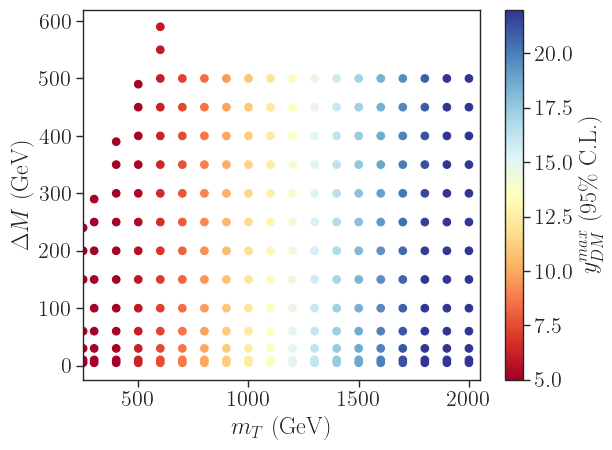

In [14]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,2050.)
# plt.yscale('log')
plt.show()

In [15]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{g}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.show()

KeyError: 'Cg (95% C.L.)'

In [16]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['Cq (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{q}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.show()

KeyError: 'mST'

In [17]:
x = recastData['Cq (95% C.L.)']*1e6
y = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,y,s=30)
plt.xlabel(r'$C_{q}^{max}$ TeV$^{-2}$')
plt.ylabel(r'$C_{g}^{max}$ TeV$^{-2}$')
# plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

KeyError: 'Cq (95% C.L.)'

### Interpolate for a denser grid

In [30]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([4*np.pi, 5.,10.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

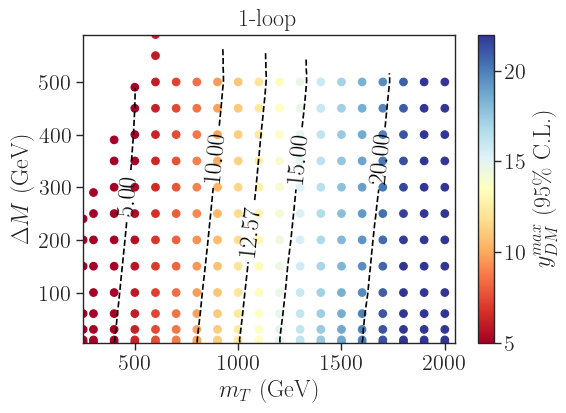

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,2050.)
plt.show()

In [32]:
recastData[recastData['mPsiT'] ==700.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
57,700.0,200.0,7.225227
58,700.0,250.0,7.348626
59,700.0,300.0,7.465171
60,700.0,350.0,7.611485
61,700.0,400.0,7.768005
62,700.0,450.0,7.926777
63,700.0,500.0,8.085132
64,700.0,550.0,8.238169
65,700.0,600.0,8.402187
66,700.0,640.0,8.542419


In [33]:
recastData[recastData['mPsiT'] ==1500.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
161,1500.0,1000.0,17.086528
162,1500.0,1050.0,17.261434
163,1500.0,1100.0,17.431480
164,1500.0,1150.0,17.593558
165,1500.0,1200.0,17.755996
166,1500.0,1250.0,17.912339
167,1500.0,1300.0,18.085597
168,1500.0,1350.0,18.252419
169,1500.0,1400.0,18.419671
170,1500.0,1440.0,18.560291


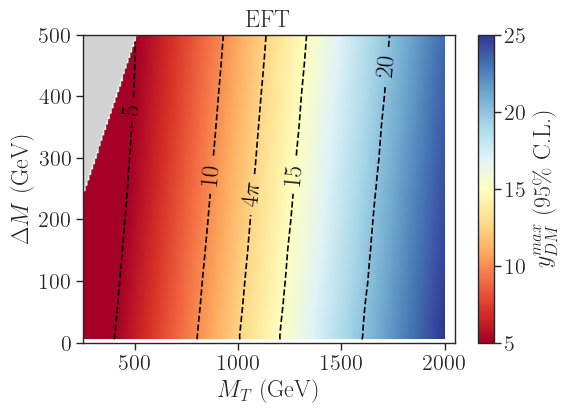

In [38]:
custom_labels = {
    cValues[0]: r'$5$', 
    cValues[1]: r'$10$', 
    cValues[2]: r'$4\pi$',
    cValues[3]: r'$15$',
    cValues[4]: r'$20$'
}
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18, fmt = custom_labels)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('EFT')
plt.xlim(250.,2050.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_eft.png', bbox_inches='tight')
plt.show()

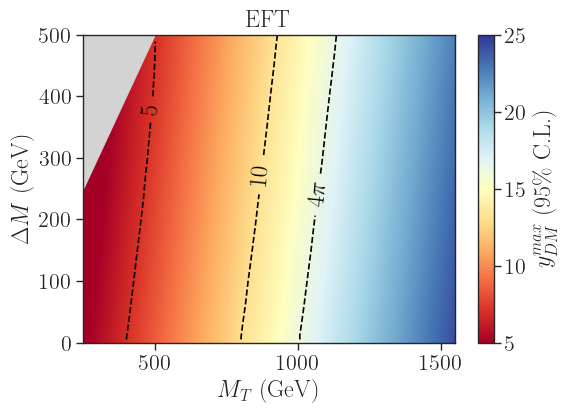

In [40]:
custom_labels = {
    cValues[0]: r'$5$', 
    cValues[1]: r'$10$', 
    cValues[2]: r'$4\pi$'
}
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[100.0,1600.0, 0, 600.0], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues[:3], colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18, fmt = custom_labels)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('EFT')
plt.xlim(250.,1550.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_eft.png', bbox_inches='tight')
plt.show()

### Save contour curves to text files

In [41]:
fname = 'CMS_mtt_eft_contours.csv'
saveContours(contoursDict,fname,header='mPsiT_GeV,deltaM_GeV')


Contours saved to CMS_mtt_eft_contours.csv
